## Cell Detection (Red blood cells, White blood cells & Platelets)

In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os
import cv2

In [2]:
print("CUDA Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0))

CUDA Available: True
GPU Name: NVIDIA GeForce GTX 1650


PyTorch has detected the GPU correctly

In [ ]:
!python yolov5/train.py \
    --img 640 \
    --batch 16 \
    --epochs 50 \
    --data data.yaml \
    --cfg yolov5s.yaml \
    --weights '' \
    --name bccd_model \
    --device 0

The PC get stuck even if the tasks were given to GPU, therefore stopped the training...  
Ran the above code snippet in Google Colaboratary and trained the model using a Tesla T4 GPU

In [3]:
!python yolov5/detect.py \
  --weights yolov5/runs/train/bccd_model4/weights/best.pt \
  --data data.yaml \
  --img 640 \
  --conf 0.25 \
  --source test/images \
  --save-txt \
  --save-conf

detect: weights=['yolov5/runs/train/bccd_model4/weights/best.pt'], source=test/images, data=data.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-411-gf4d8a84c Python-3.10.16 torch-2.5.1 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/36 D:\Yolo_Assignment\test\images\BloodImage_00038_jpg.rf.63d04b5c9db95f32fa7669f72e4903ca.jpg: 480x640 1 Platelets, 24 RBCs, 1 WBC, 33.9ms
image 2/36 D:\Yolo_Assignment\test\images\BloodImage_00044_jpg.rf.589ee3d351cb6d9a3f7b7a942da5370a.jpg: 480x640 3 Plateletss, 17 RBCs, 2 WBCs, 15.0ms
ima

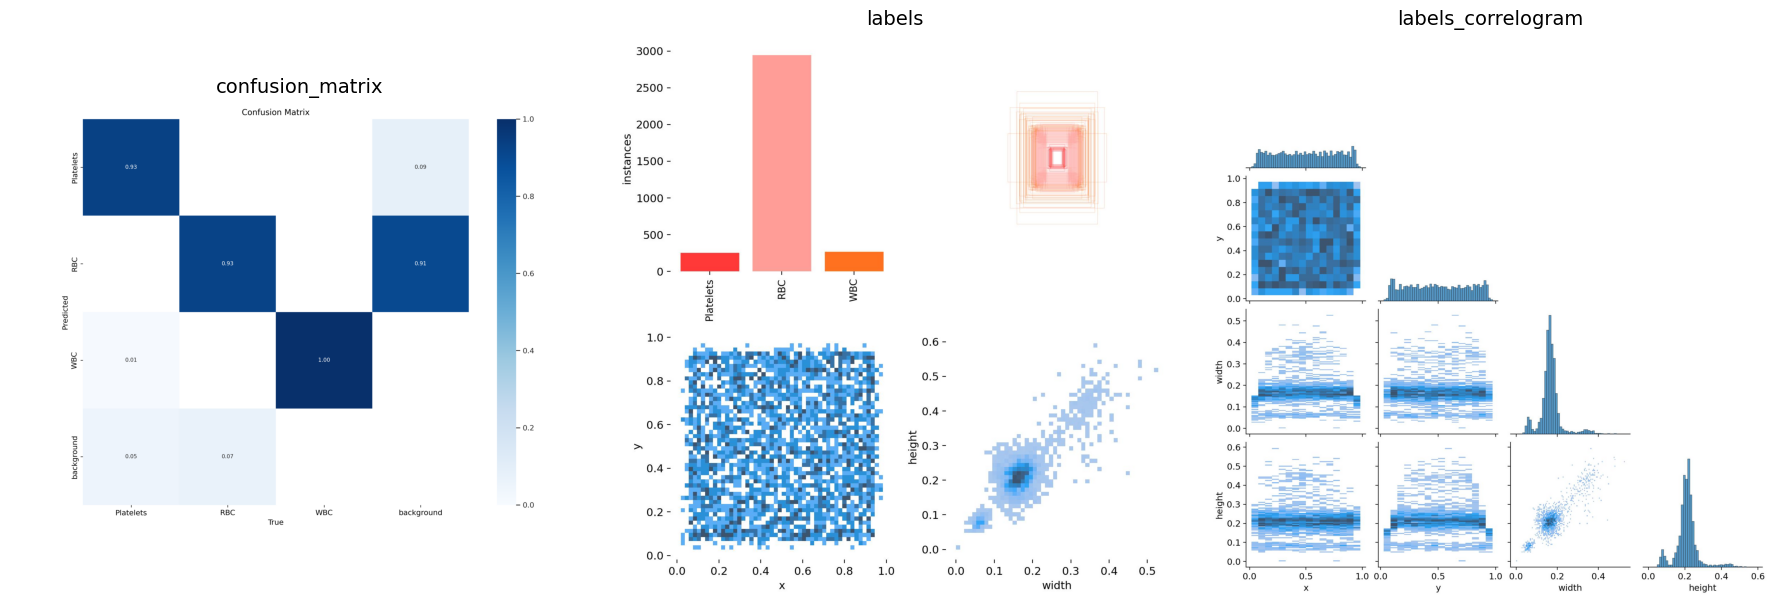

In [4]:
base_path = 'yolov5/runs/train/bccd_model4/'
image_paths = ['confusion_matrix.png', 'labels.jpg', 'labels_correlogram.jpg']
titles = ["confusion_matrix", "labels", "labels_correlogram"]
images = [cv2.cvtColor(cv2.imread(base_path + path), cv2.COLOR_BGR2RGB) for path in image_paths]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, ax in enumerate(axes.flat):
    ax.imshow(images[idx])
    ax.axis('off')
    ax.set_title(titles[idx], fontsize=14)

plt.tight_layout()
plt.show()

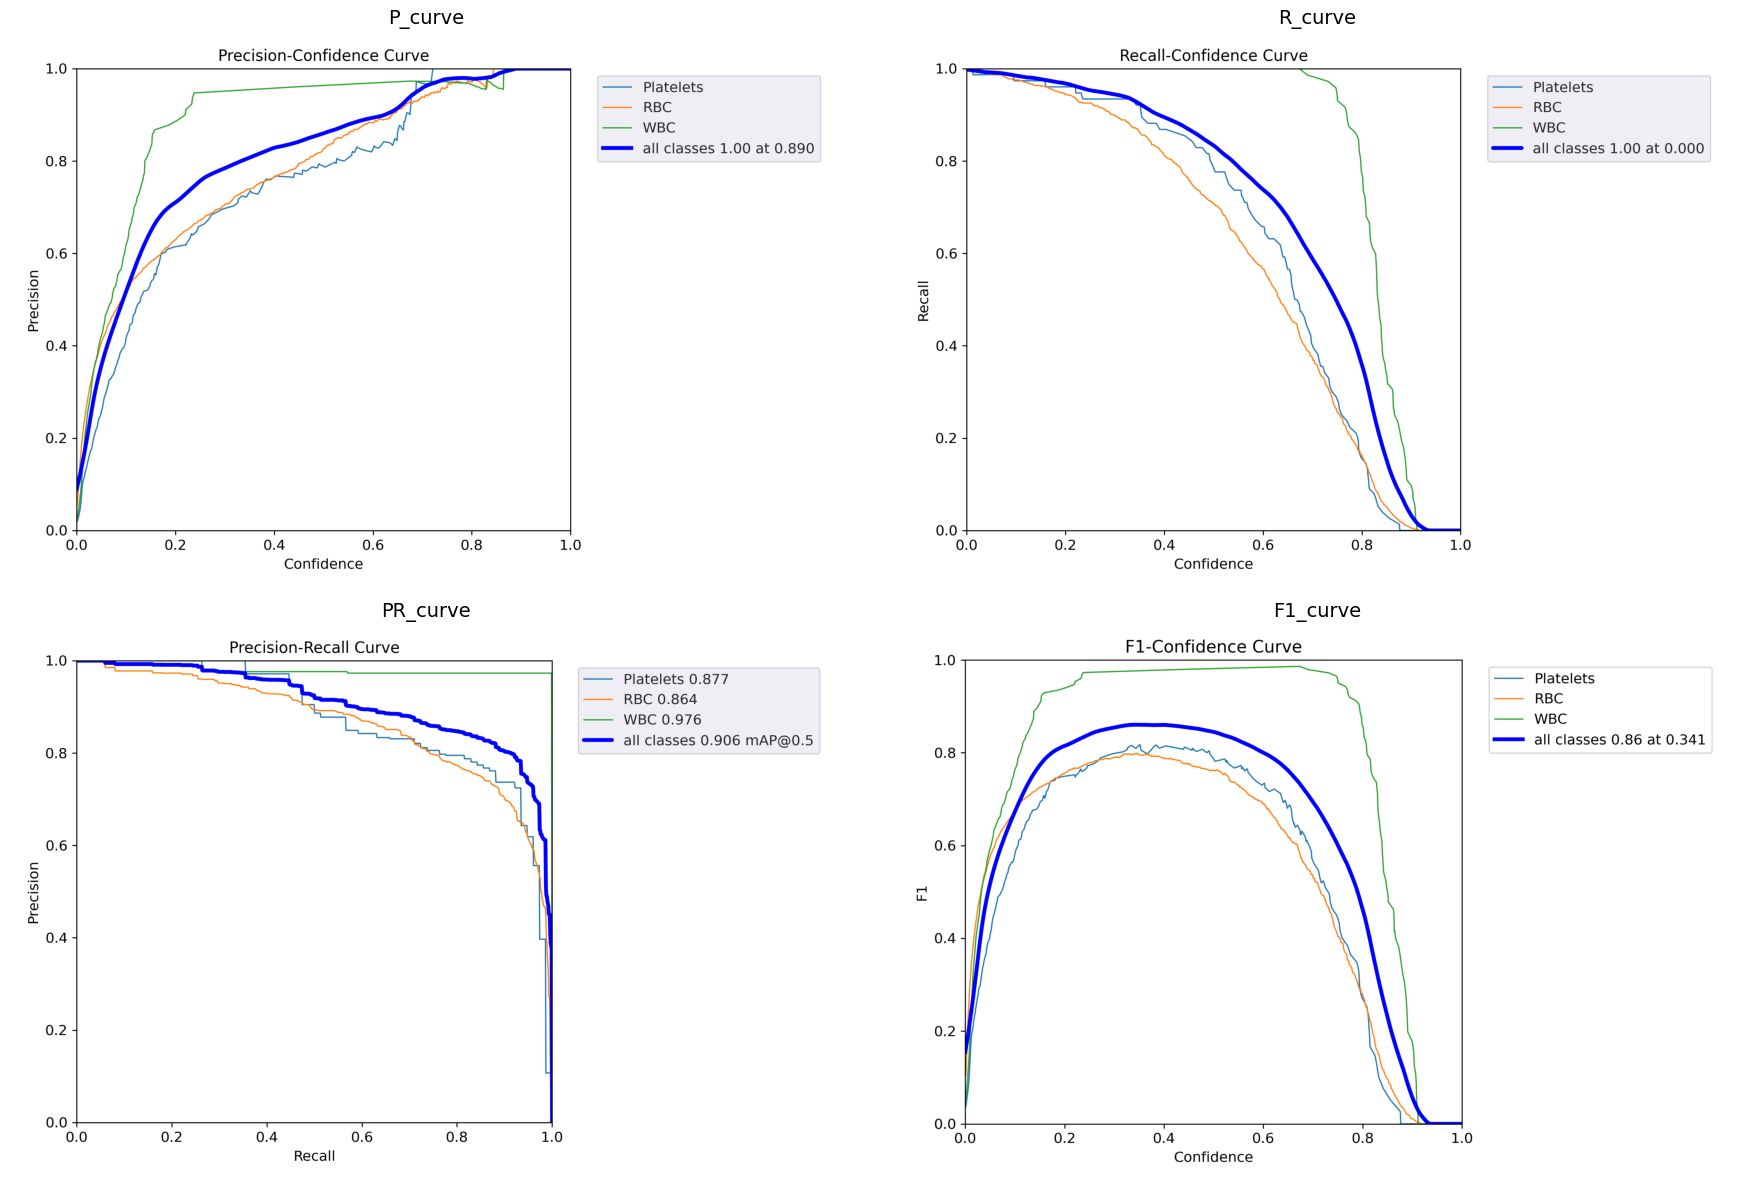

In [5]:
base_path = 'yolov5/runs/train/bccd_model4/'
image_paths = ['P_curve.png', 'R_curve.png', 'PR_curve.png', 'F1_curve.png']
titles = ["P_curve", "R_curve", "PR_curve", "F1_curve"]
images = [cv2.cvtColor(cv2.imread(base_path + path), cv2.COLOR_BGR2RGB) for path in image_paths]
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

for idx, ax in enumerate(axes.flat):
    ax.imshow(images[idx])
    ax.axis('off')
    ax.set_title(titles[idx], fontsize=14)

plt.tight_layout()
plt.show()

After downloading the model (model parameters), used the model for the test dataset with detecting Red blood cells, white blood cells and platelets

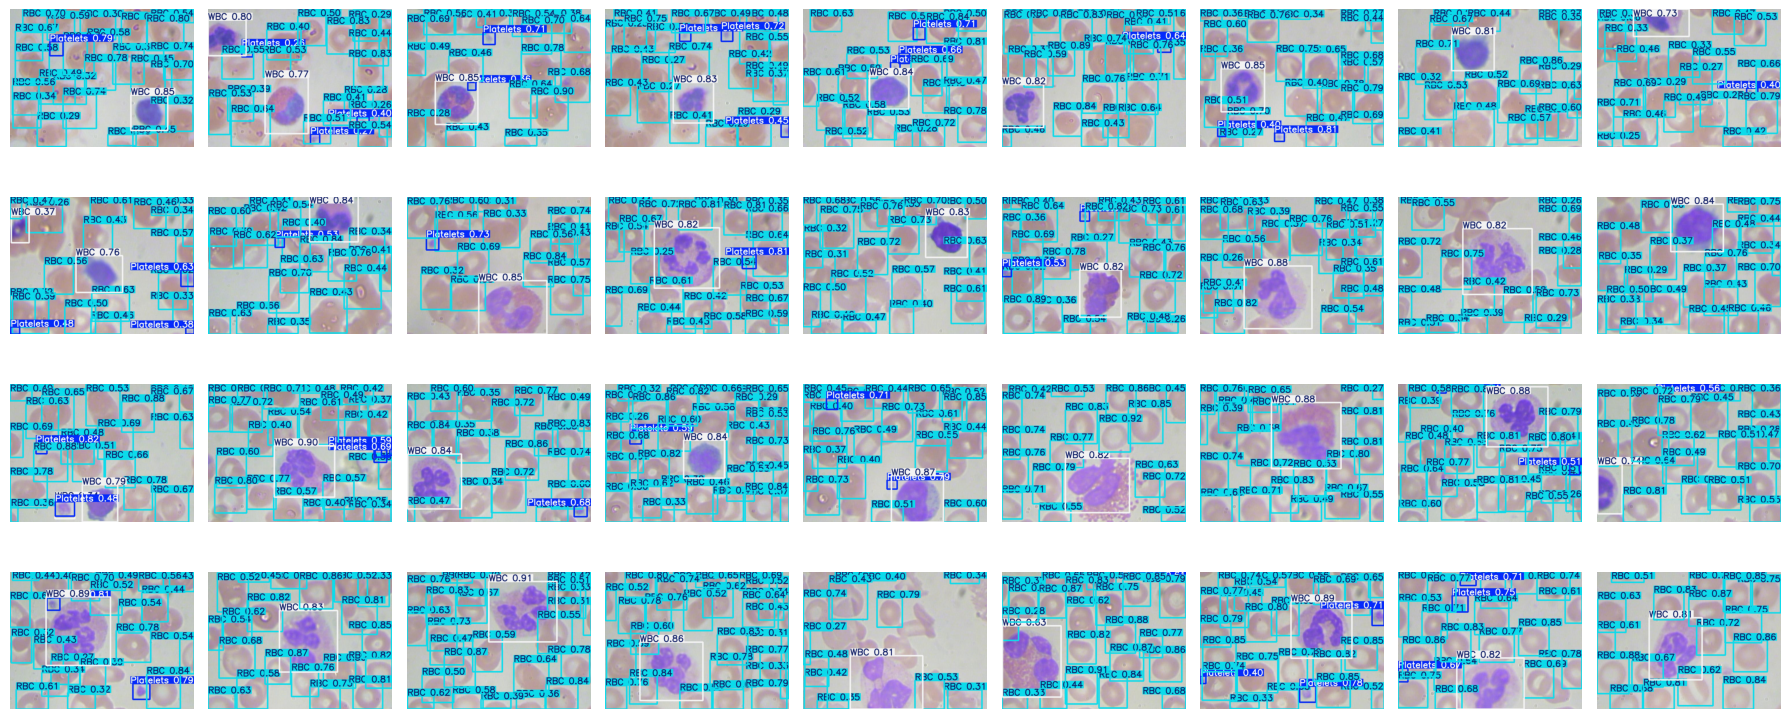

In [6]:
detect_dir = sorted(glob.glob('yolov5/runs/detect/exp6'))[-1]
image_paths = sorted(glob.glob(os.path.join(detect_dir, '*.jpg')))
image_paths = image_paths[:36]
fig, axes = plt.subplots(4, 9, figsize=(18, 8))

for i, ax in enumerate(axes.flat):
    if i < len(image_paths):
        img = mpimg.imread(image_paths[i])
        ax.imshow(img)
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:
!python yolov5/detect.py \
  --weights yolov5/runs/train/bccd_model4/weights/best.pt \
  --data data.yaml \
  --img 640 \
  --conf 0.25 \
  --source Images_from_internet \
  --save-txt \
  --save-conf

detect: weights=['yolov5/runs/train/bccd_model4/weights/best.pt'], source=Images_from_internet, data=data.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-411-gf4d8a84c Python-3.10.16 torch-2.5.1 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/2 D:\Yolo_Assignment\Images_from_internet\image1.JPG: 480x640 2 Plateletss, 32 RBCs, 3 WBCs, 53.9ms
image 2/2 D:\Yolo_Assignment\Images_from_internet\image2.jpg: 384x640 55 RBCs, 1 WBC, 30.4ms
Speed: 5.0ms pre-process, 42.1ms inference, 96.0ms NMS per image at shape (1, 3, 640, 640)


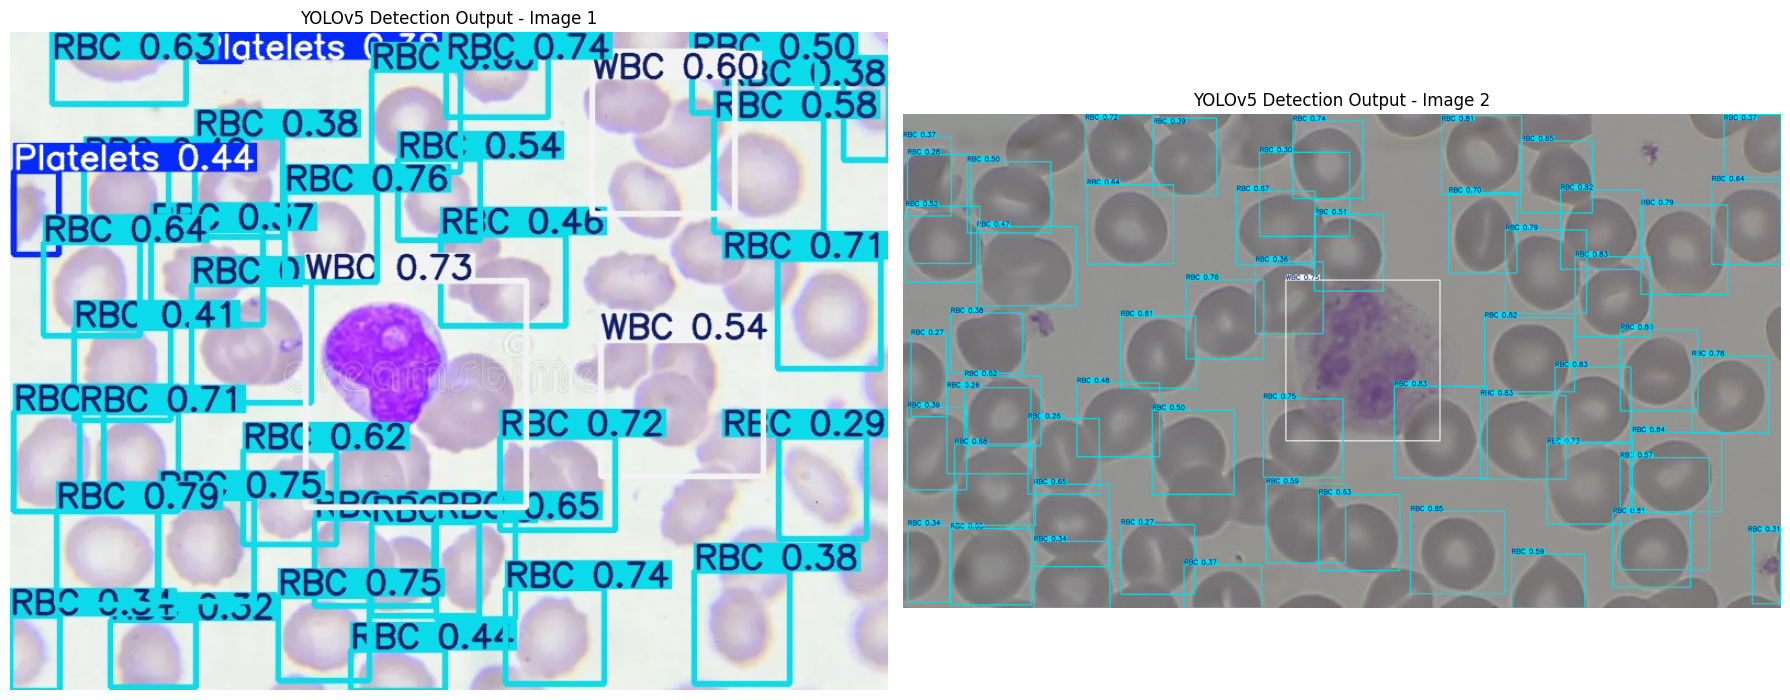

In [8]:
image_paths = ['yolov5/runs/detect/exp8/image1.jpg', 'yolov5/runs/detect/exp8/image2.jpg']
images = [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in image_paths]
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.axis('off')
    ax.set_title(f"YOLOv5 Detection Output - Image {i+1}")

plt.tight_layout()
plt.show()